<a href="https://colab.research.google.com/github/Sonu2252/Computer_Vision/blob/main/Fashion_MNIST_CNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Activation, Dense
from tensorflow.keras.utils import plot_model
from keras import backend as K
from tensorflow.keras.utils import to_categorical

In [89]:
from numpy import unique, argmax

In [90]:
from keras.datasets import fashion_mnist

In [91]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [92]:
X_train.shape

(60000, 28, 28)

In [93]:
X_test.shape

(10000, 28, 28)

In [94]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [95]:
y_train.shape

(60000,)

In [96]:
y_test.shape

(10000,)

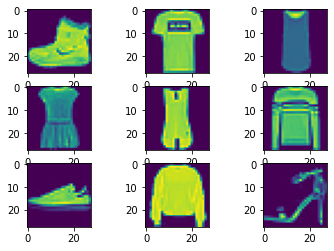

In [97]:
#Loading the fashion mnist dataset in color.
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i])
plt.show()

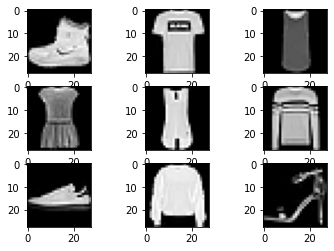

In [98]:
#Loading Fashion Mnist dataset in black and white
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [99]:
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [100]:
#One hot encode the target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [101]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [102]:
y_train.shape

(60000, 10)

In [129]:
y_test.shape

(10000, 10)

In [103]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankel Boot"]

def show_random_examples(x, y, p):
  indices = np.random.choice(range(x.shape[0]), 10, replace=False)

  x = x[indices]
  y = y[indices]
  p = p[indices]

  plt.figure(figsize=(10, 5))
  for i in range(10):
    plt.subplot(2, 5, 1+i)
    plt.imshow(x[i])
    plt.xticks([])
    plt.yticks([])
    col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
    plt.xlabel(class_names[np.argmax(p[i])], color=col)
  plt.show()

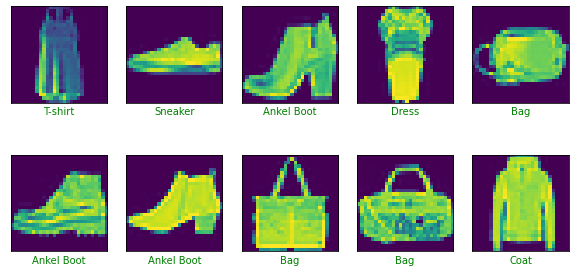

In [104]:
show_random_examples(X_train, y_train, y_train)

In [105]:
X_train.shape

(60000, 28, 28)

In [106]:
img_shape = X_train.shape[1:]
print(img_shape)

(28, 28)


In [107]:
model = Sequential([
            Conv2D(32, (3, 3), activation="relu", input_shape = (28, 28, 1)),
            MaxPool2D((2, 2)),
            Conv2D(48, (3, 3), activation="relu"),
            MaxPool2D((2, 2)),
            Dropout(0.5),
            Flatten(),
            Dense(500, activation="relu"),
            Dense(10, activation="softmax")
])

In [108]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

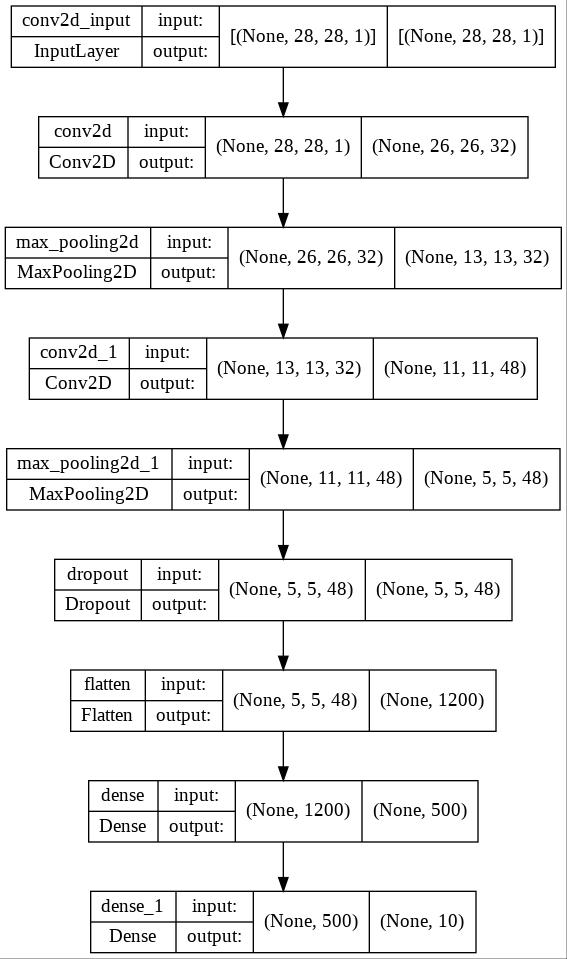

In [109]:
plot_model(model, 'model.jpg', show_shapes=True)

In [110]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [111]:
history_1 = model.fit(X_train, y_train, epochs=15, batch_size=128, validation_data=(X_test/255., y_test))

Epoch 1/15
469/469 [==============================] - 13s 6ms/step - loss: 0.5590 - accuracy: 0.7962 - val_loss: 3.3430 - val_accuracy: 0.1000
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3885 - accuracy: 0.8593 - val_loss: 3.3787 - val_accuracy: 0.1000
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3408 - accuracy: 0.8746 - val_loss: 3.6422 - val_accuracy: 0.1000
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3112 - accuracy: 0.8852 - val_loss: 4.6888 - val_accuracy: 0.1000
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2891 - accuracy: 0.8927 - val_loss: 3.2377 - val_accuracy: 0.1000
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2738 - accuracy: 0.8987 - val_loss: 3.9707 - val_accuracy: 0.1000
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2578 - accuracy: 0.9041 - val_loss: 3.6730 - val_accuracy: 0.1000
Epoch

In [112]:
import pandas as pd

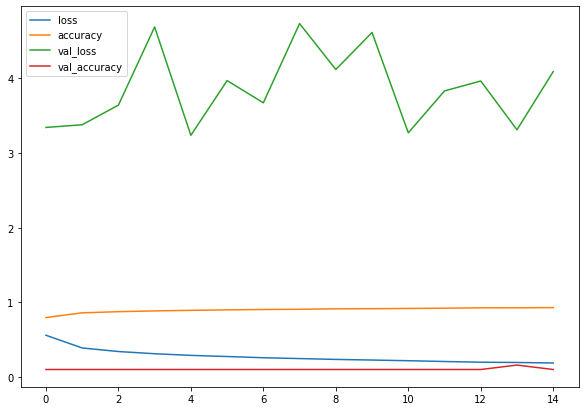

In [113]:
pd.DataFrame(history_1.history).plot(figsize=(10,7));

In [114]:
def plot_loss_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

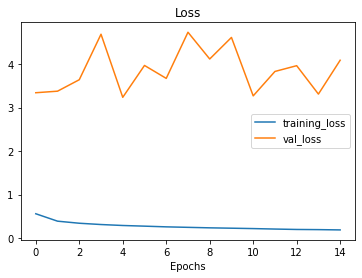

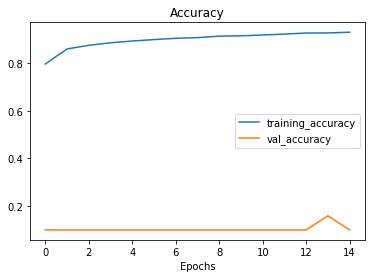

In [115]:
plot_loss_curves(history_1)

In [116]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2301 - accuracy: 0.9169


In [117]:
print(f"Accuracy: {accuracy*100}%")

Accuracy: 91.68999791145325%


In [118]:
image = X_train[5]

In [119]:
from pylab import *

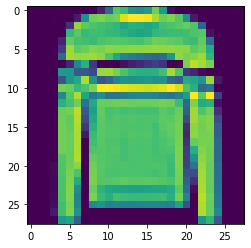

In [120]:
imshow(image)

In [122]:
image.shape

(28, 28)

In [130]:
predicted = model.predict(X_test)

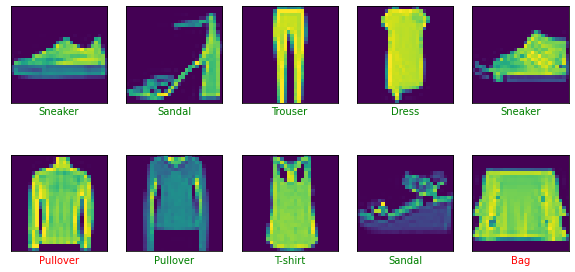

In [131]:
#So it shows the predicted values, which might be correct or not according to the test values.
show_random_examples(X_test, y_test, predicted)